

# Covid-19 en Madrid. Incidencia por Zonas 

In [1]:
WORK_FOLDER='../'

In [2]:
import sys
sys.path.append(WORK_FOLDER)

In [3]:
import numpy as np
from utils.helper import loadCovidData, filterCovidData, loadPopulationData, loadResData, loadAgeData, mergeData
from utils.helper import comparePlaces, plotPlaces, showPopulationAgeProfile, scatterPlaces
%matplotlib inline

In [4]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Carga de datos de la fuente oficial

In [5]:
#!wget https://datos.comunidad.madrid/catalogo/dataset/7da43feb-8d4d-47e0-abd5-3d022d29d09e/resource/b2a3a3f9-1f82-42c2-89c7-cbd3ef801412/download/covid19_tia_muni_y_distritos.csv --no-check-certificat -O ../datasets/covid19_tia_muni_y_distritos.csv

In [6]:
df = loadCovidData(prefix=WORK_FOLDER)

## Lista de municipios y distritos a observar

In [7]:
madrid_places = df[df['municipio_distrito'].str.startswith('Madrid')]['municipio_distrito'].unique()
loc_places = np.array(['Getafe','Leganés','Fuenlabrada','Alcorcón','Móstoles','Parla',
                       'Alcalá de Henares','Torrejón de Ardoz','Coslada',
                       'Pozuelo de Alarcón','Majadahonda','Las Rozas de Madrid','Collado Villalba'])
places = np.concatenate([madrid_places, loc_places])

### Indicencia total ordenada por zona

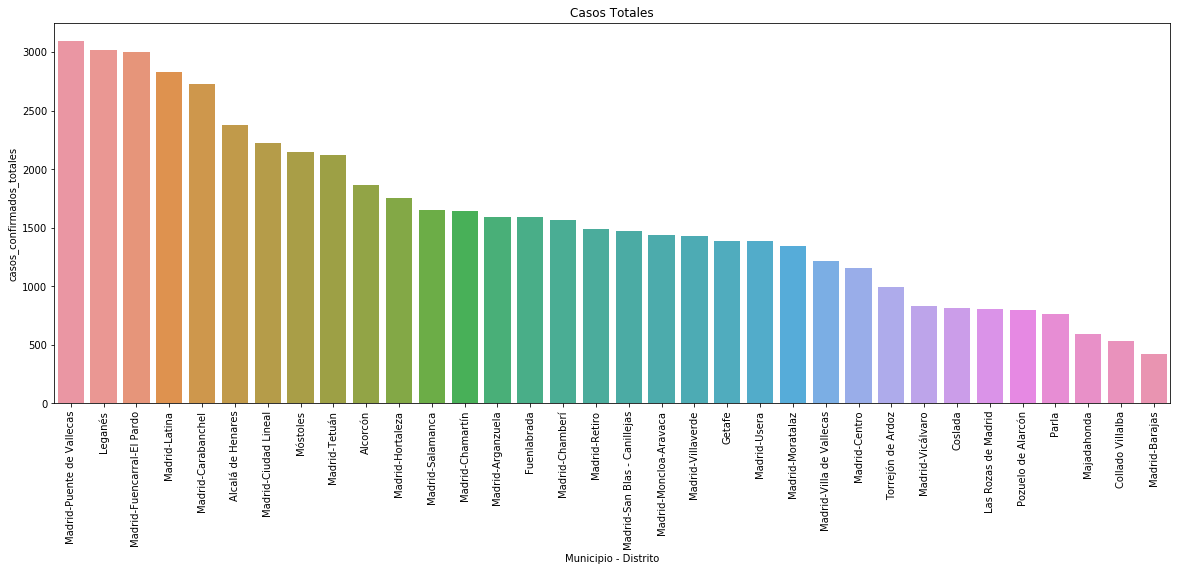

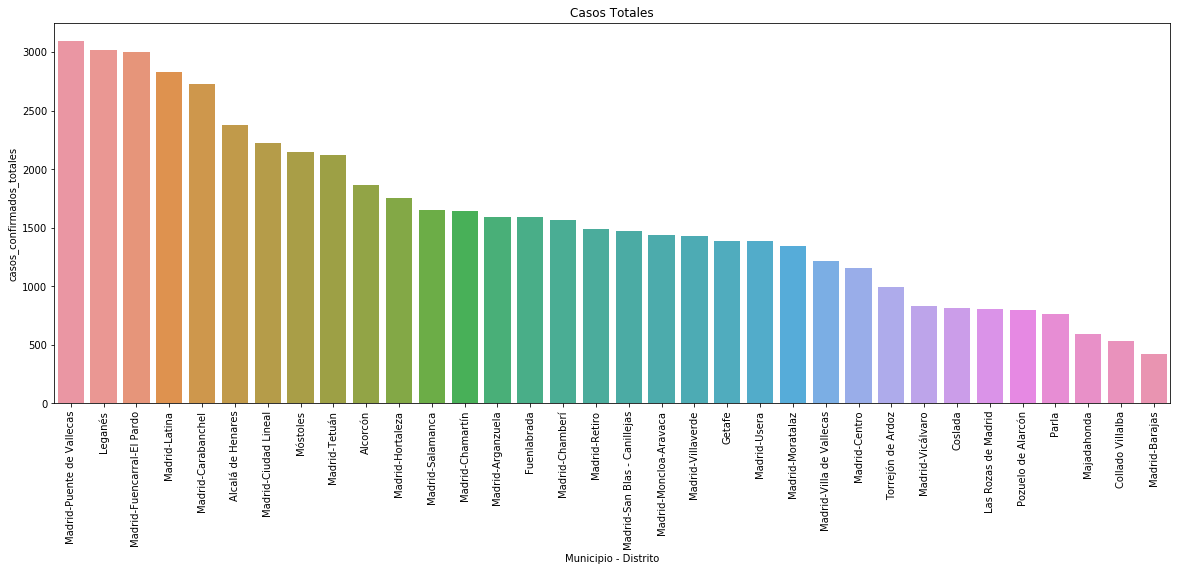

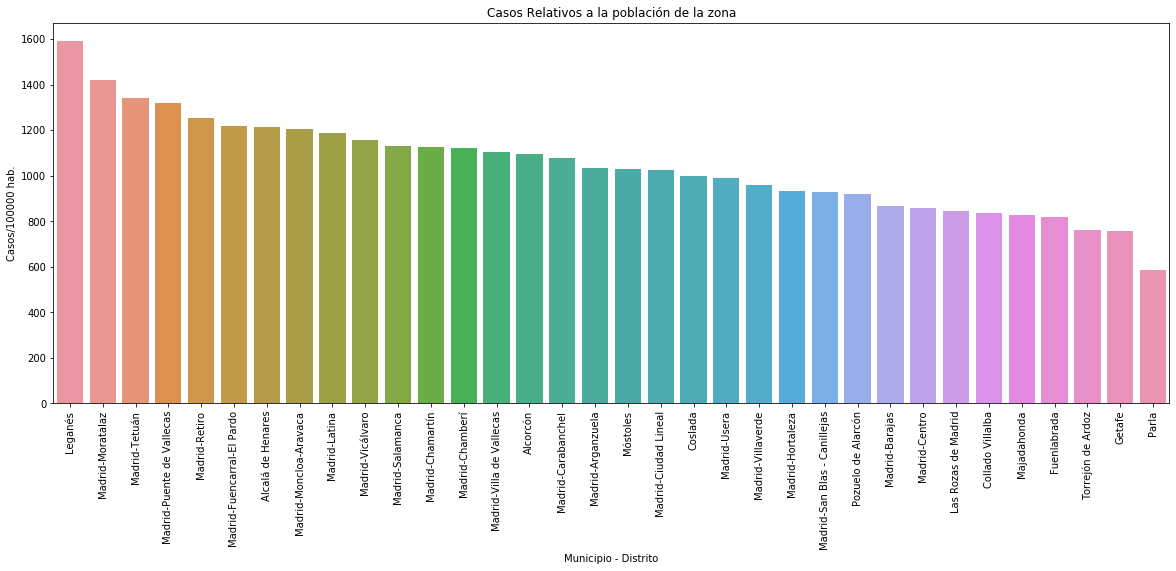

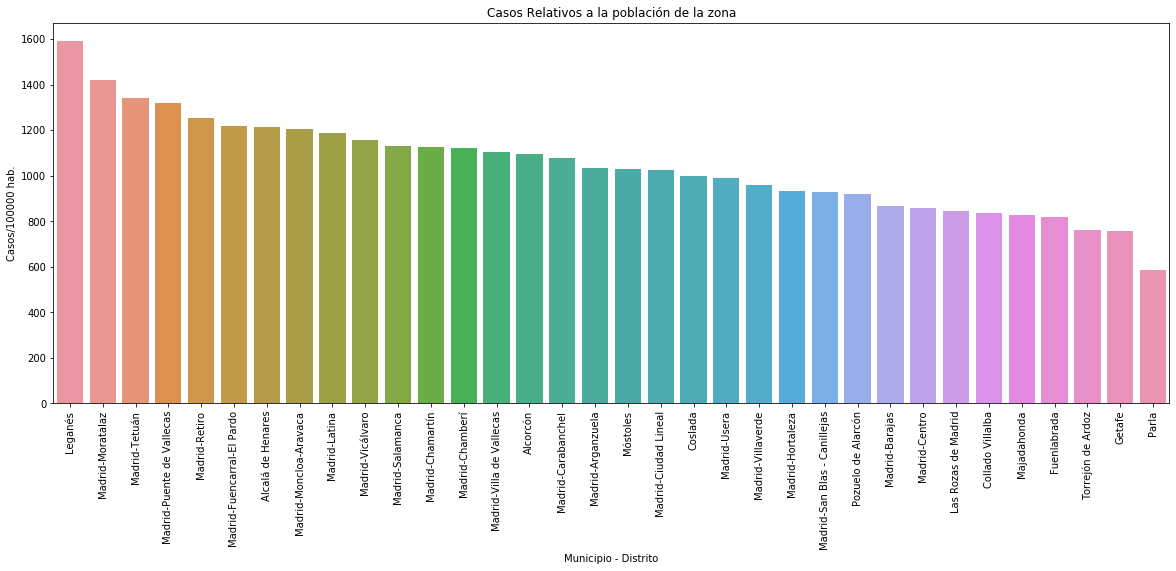

In [8]:
comparePlaces(df,places)

### Evolución de casos detectados por día por zona 

/anaconda3/envs/dsbase/lib/python3.6/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)
/anaconda3/envs/dsbase/lib/python3.6/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


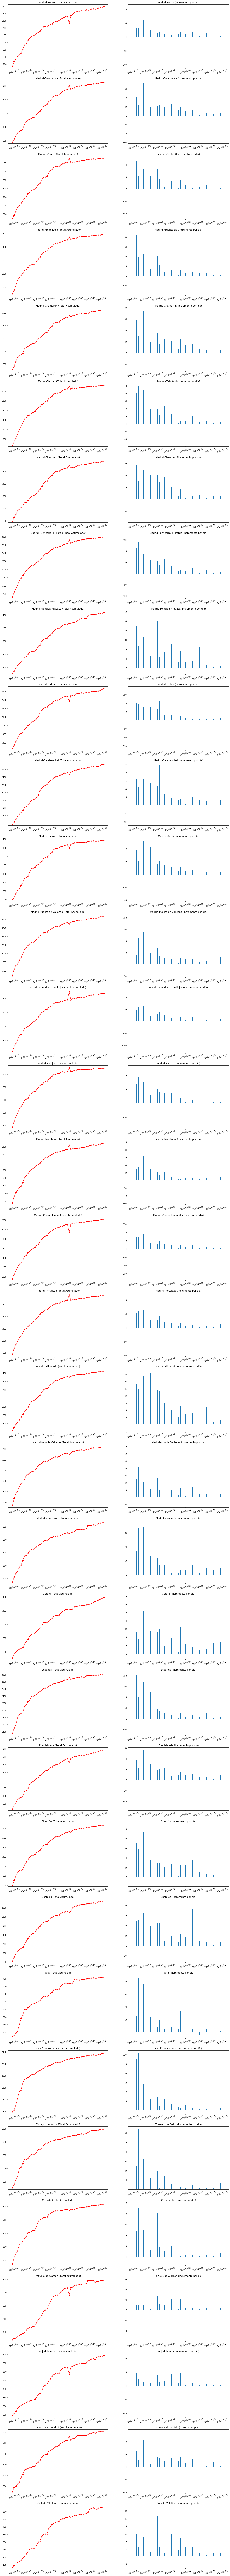

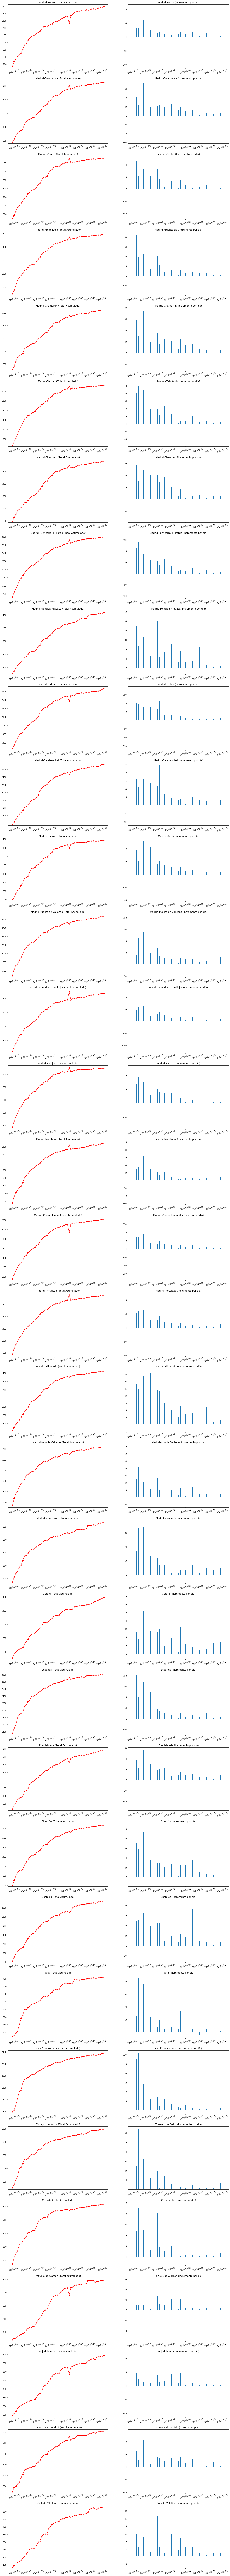

In [9]:
plotPlaces(df,places,agg_factor=1)

## Peso de la edad de la población en la incidencia

Realizaremos una serie de visualizaciones para observar el peso de la edad de la población en la incidencia de Covid-19 las zonas seleccionadas anteriormente:

### Carga de datos adicionales y combinación

In [10]:
# Filtramos para quedarnos con los últimos datos de la serie
df_covid = filterCovidData(df)
# Número de habitantes por municipio distrito
df_pop = loadPopulationData(prefix=WORK_FOLDER)
# Número de plazas de residencia en cada municipio (No se incluyen los distritos de Madrid)
df_res = loadResData(prefix=WORK_FOLDER)
# Número de censados agrupados por edad y agregado de mayores de los años que indique el parámetro 'age_th'
age_th=70
df_age_profile, df_age_th = loadAgeData(age_th, prefix=WORK_FOLDER)

A continuación uniremos estos datos en una única tabla:

In [11]:
df_completed = mergeData(df_covid, df_pop, df_res, df_age_th)

Filtramos por los lugares con mas de cierto número de habitantes: 

In [12]:
df_completed_cities=df_completed[df_completed['habitantes'] > 50000]

### Observación de la Incidencia Vs unidades relativas en relación con la edad

Tasa de incidencia acumulada / 100.000 habitantes Vs Plazas de residencias en el municipio / 1000 habitantes:

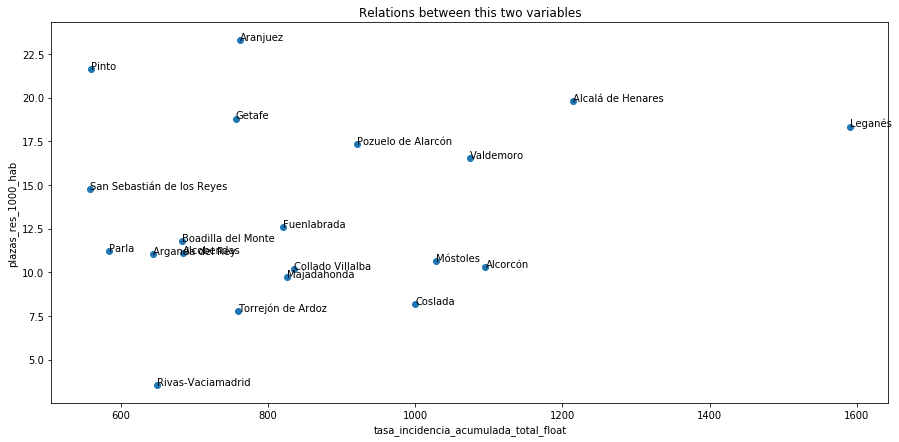

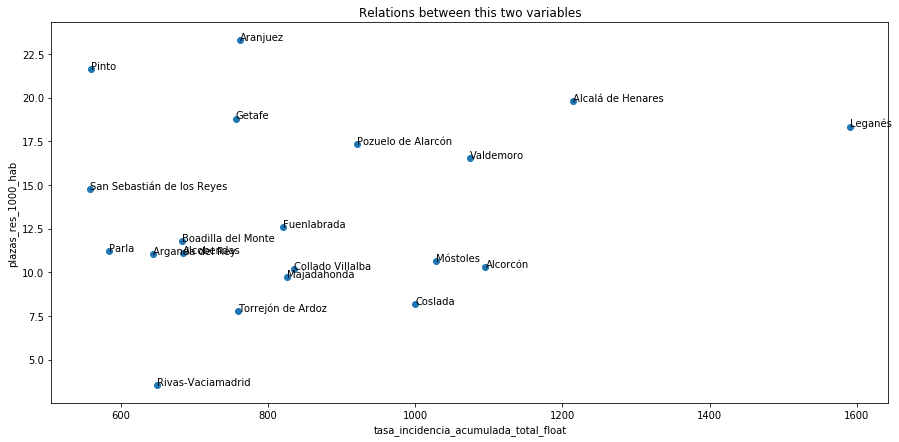

In [13]:
scatterPlaces(df_completed_cities,'tasa_incidencia_acumulada_total_float','plazas_res_1000_hab')

Tasa de incidencia acumulada / 100.000 habitantes Vs Porcentaje de población por encima de la edad señalada en "age_th": 

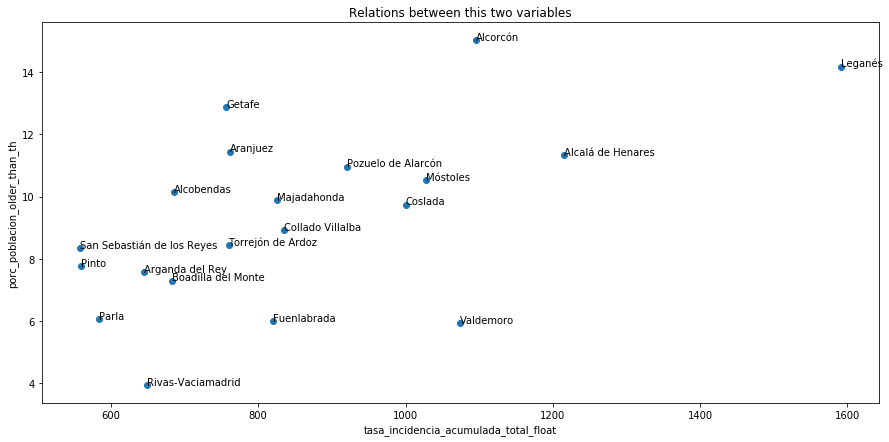

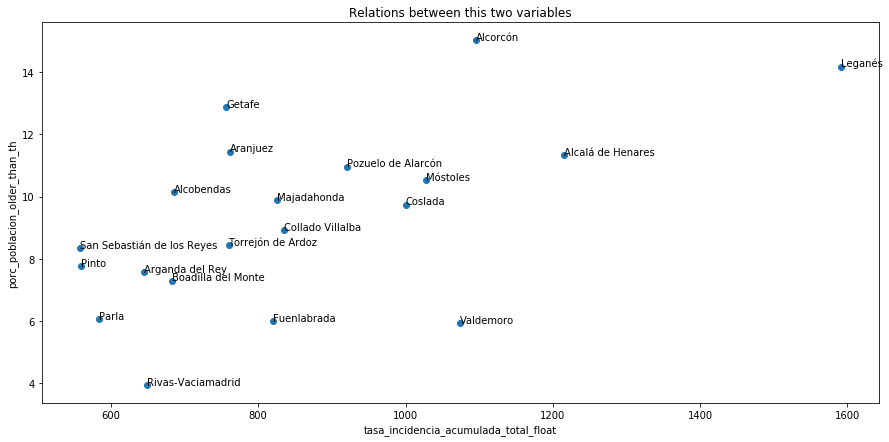

In [14]:
scatterPlaces(df_completed_cities,'tasa_incidencia_acumulada_total_float','porc_poblacion_older_than_th')

### Conclusión

Atendiendo especialmente a la segunda gráfica parece que puede haber una cierta relación entre incidencia y edad.

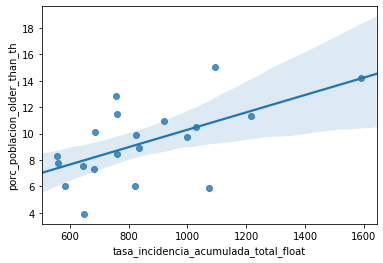

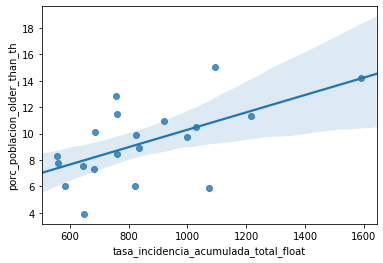

In [15]:
scatterPlaces(df_completed_cities,'tasa_incidencia_acumulada_total_float','porc_poblacion_older_than_th',reg=True)

No obstante no parece ser determinante si atendemos a casos anómalos como los siguientes:
* Rivas, Parla y Valdemoro: Con un volumen de casos intermedio para una población jovén, especialmente Fuenlabrada
* Getafe y Alcorcón con un numero de casos reletivamente bajo, especialmente Getafe para una población con un perfil de edad de la población parecida a la lugares con alta incidencia, como Leganés y Alcalá.

De hecho, observese el perfil poblacional de estos 2 municipios, en ellos la incidencia es muy dispar, mientras que el perfil es bastante parecido. Siendo además los municipios con mayor número de plazas en residencias:

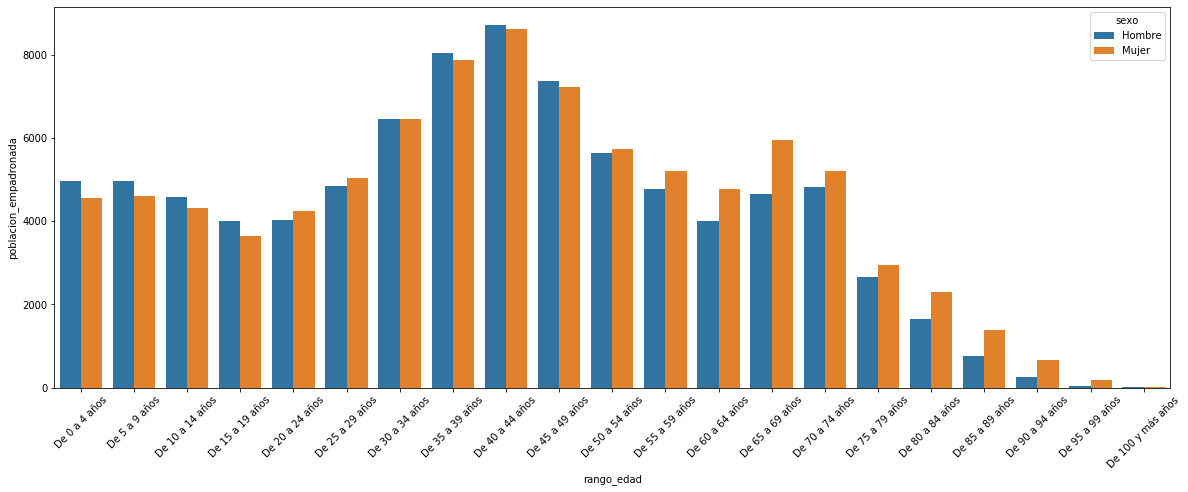

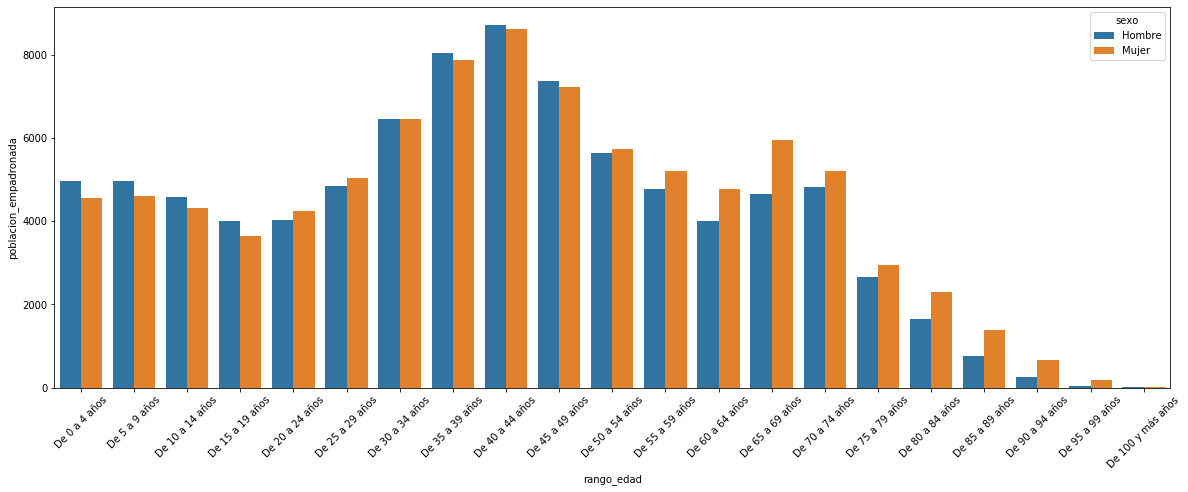

In [16]:
showPopulationAgeProfile(df_age_profile,'Getafe')

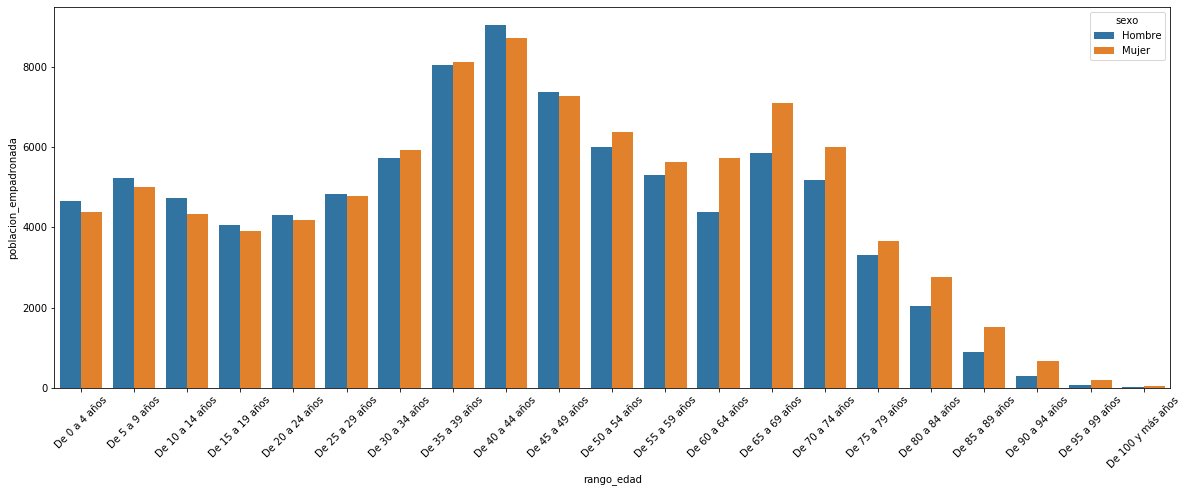

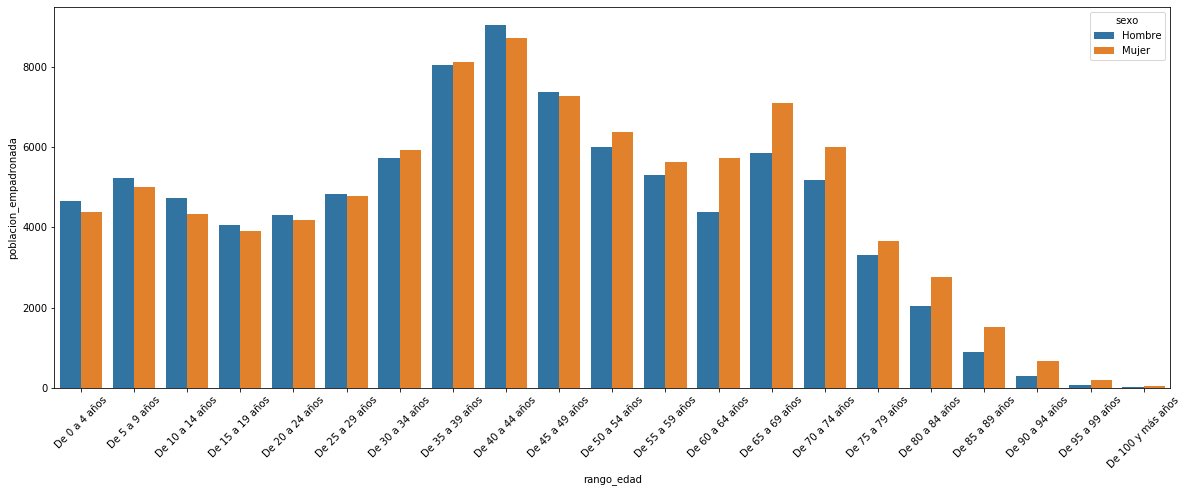

In [17]:
showPopulationAgeProfile(df_age_profile,'Leganés')

Conclusión, La incidencia depende, además de la edad, de otros factores que habrá que seguir investigando. 

## Top incidencia en el último día

In [18]:
df_completed_cities

,casos_confirmados_totales,municipio_distrito,tasa_incidencia_acumulada_total_float,densidad_por_km2,habitantes,superficie_km2,plazas_autorizadas_numero,poblacion_older_than_th,plazas_res_1000_hab,porc_poblacion_older_than_th
0,796.0,Pozuelo de Alarcón,921.06,1986.19,85604.7890,43.10,1483,9388,17.323797,10.966676
1,1868.0,Alcorcón,1095.51,5008.67,168141.0519,33.57,1732,25288,10.300875,15.039754
14,454.0,Aranjuez,761.66,307.99,58213.1899,189.01,1357,6666,23.310868,11.451013
17,817.0,Coslada,1000.48,6906.07,83010.9614,12.02,680,8089,8.191689,9.744496
27,1589.0,Fuenlabrada,820.34,4968.58,194668.9644,39.18,2448,11681,12.575194,6.000443
28,294.0,Pinto,559.72,813.84,50441.8032,61.98,1091,3924,21.628886,7.779262
41,2150.0,Móstoles,1027.80,4601.09,206588.9410,44.90,2196,21744,10.629804,10.525249
42,3021.0,Leganés,1591.16,4342.35,187719.7905,43.23,3443,26624,18.341167,14.182841
47,760.0,Parla,584.06,5031.89,125897.8878,25.02,1412,7622,11.215438,6.054113
61,373.0,Boadilla del Monte,683.53,1086.18,51463.2084,47.38,607,3757,11.794834,7.300361


,casos_confirmados_totales,municipio_distrito,tasa_incidencia_acumulada_total_float,densidad_por_km2,habitantes,superficie_km2,plazas_autorizadas_numero,poblacion_older_than_th,plazas_res_1000_hab,porc_poblacion_older_than_th
0,796.0,Pozuelo de Alarcón,921.06,1986.19,85604.7890,43.10,1483,9388,17.323797,10.966676
1,1868.0,Alcorcón,1095.51,5008.67,168141.0519,33.57,1732,25288,10.300875,15.039754
14,454.0,Aranjuez,761.66,307.99,58213.1899,189.01,1357,6666,23.310868,11.451013
17,817.0,Coslada,1000.48,6906.07,83010.9614,12.02,680,8089,8.191689,9.744496
27,1589.0,Fuenlabrada,820.34,4968.58,194668.9644,39.18,2448,11681,12.575194,6.000443
28,294.0,Pinto,559.72,813.84,50441.8032,61.98,1091,3924,21.628886,7.779262
41,2150.0,Móstoles,1027.80,4601.09,206588.9410,44.90,2196,21744,10.629804,10.525249
42,3021.0,Leganés,1591.16,4342.35,187719.7905,43.23,3443,26624,18.341167,14.182841
47,760.0,Parla,584.06,5031.89,125897.8878,25.02,1412,7622,11.215438,6.054113
61,373.0,Boadilla del Monte,683.53,1086.18,51463.2084,47.38,607,3757,11.794834,7.300361


# Fin de la visualización